In [ ]:
import os
os.makedirs("/kaggle/working/models", exist_ok=True)

In [ ]:
import os

base_path = "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
print(os.listdir(base_path))


In [ ]:
train_dir = base_path + "/train"
val_dir = base_path + "/valid"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

num_classes = train_gen.num_classes
print("Classes:", num_classes)
print(train_gen.class_indices)


In [ ]:
!pip install --upgrade protobuf==3.20.3


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

num_classes = train_gen.num_classes
print("Classes:", num_classes)
print(train_gen.class_indices)


NameError: name 'train_dir' is not defined

In [3]:
base_path = "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"


In [4]:
train_dir = base_path + "/train"
val_dir = base_path + "/valid"


In [5]:
import os
print("Train Exists:", os.path.exists(train_dir))
print("Val Exists:", os.path.exists(val_dir))


Train Exists: True
Val Exists: True


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [7]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

base_model = MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output_layer = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output_layer)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


I0000 00:00:1763822845.349538     123 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


NameError: name 'num_classes' is not defined

In [8]:
num_classes = train_gen.num_classes
print("Number of classes:", num_classes)


Number of classes: 38


In [9]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output_layer = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output_layer)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,306,662 (8.80 MB)

 Trainable params: 48,678 (190.15 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [10]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint_path = "/kaggle/working/models/agri_guard_stage1.h5"

callbacks = [
    EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True),
    ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True)
]


In [11]:
history = model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen,
    callbacks=callbacks
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1763823009.919277     194 service.cc:148] XLA service 0x7eaa6410e240 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1763823009.920059     194 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1763823010.799409     194 cuda_dnn.cc:529] Loaded cuDNN version 90300


   1/2197 ━━━━━━━━━━━━━━━━━━━━ 7:21:12 12s/step - accuracy: 0.0312 - loss: 4.6002

I0000 00:00:1763823014.598251     194 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 501ms/step - accuracy: 0.7236 - loss: 0.9996

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1245s 562ms/step - accuracy: 0.7237 - loss: 0.9994 - val_accuracy: 0.9030 - val_loss: 0.2924
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.8993 - loss: 0.3131

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 876s 399ms/step - accuracy: 0.8993 - loss: 0.3131 - val_accuracy: 0.9246 - val_loss: 0.2341
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.9121 - loss: 0.2695

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 854s 388ms/step - accuracy: 0.9121 - loss: 0.2695 - val_accuracy: 0.9289 - val_loss: 0.2173
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.9109 - loss: 0.2664

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 858s 391ms/step - accuracy: 0.9109 - loss: 0.2664 - val_accuracy: 0.9381 - val_loss: 0.1951
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 0.9175 - loss: 0.2465

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 852s 388ms/step - accuracy: 0.9175 - loss: 0.2465 - val_accuracy: 0.9372 - val_loss: 0.1901
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.9177 - loss: 0.2491

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 841s 383ms/step - accuracy: 0.9177 - loss: 0.2491 - val_accuracy: 0.9385 - val_loss: 0.1866
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 843s 383ms/step - accuracy: 0.9184 - loss: 0.2484 - val_accuracy: 0.9339 - val_loss: 0.2047
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.9194 - loss: 0.2451

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 851s 387ms/step - accuracy: 0.9194 - loss: 0.2451 - val_accuracy: 0.9413 - val_loss: 0.1774
Epoch 9/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 833s 379ms/step - accuracy: 0.9221 - loss: 0.2405 - val_accuracy: 0.9363 - val_loss: 0.1963
Epoch 10/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 843s 384ms/step - accuracy: 0.9228 - loss: 0.2342 - val_accuracy: 0.9287 - val_loss: 0.2212


In [12]:
base_model.trainable = True

fine_tune_at = 100

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False


In [13]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [14]:
fine_tune_epochs = 5

history_fine = model.fit(
    train_gen,
    epochs=fine_tune_epochs,
    validation_data=val_gen,
    callbacks=callbacks
)


Epoch 1/5


E0000 00:00:1763832108.796300     197 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1763832108.993569     197 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


1464/2197 ━━━━━━━━━━━━━━━━━━━━ 4:23 360ms/step - accuracy: 0.8666 - loss: 0.5417

E0000 00:00:1763832643.662407     197 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1763832643.861569     197 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 870s 385ms/step - accuracy: 0.8847 - loss: 0.4515 - val_accuracy: 0.9491 - val_loss: 0.1853
Epoch 2/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.9664 - loss: 0.1009

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 829s 377ms/step - accuracy: 0.9664 - loss: 0.1009 - val_accuracy: 0.9576 - val_loss: 0.1482
Epoch 3/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.9774 - loss: 0.0676

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 811s 369ms/step - accuracy: 0.9774 - loss: 0.0676 - val_accuracy: 0.9675 - val_loss: 0.1132
Epoch 4/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.9826 - loss: 0.0540

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 818s 372ms/step - accuracy: 0.9826 - loss: 0.0540 - val_accuracy: 0.9771 - val_loss: 0.0819
Epoch 5/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 832s 379ms/step - accuracy: 0.9855 - loss: 0.0445 - val_accuracy: 0.9733 - val_loss: 0.0964


In [15]:
import numpy as np

val_gen.reset() 
pred_prob = model.predict(val_gen)
pred_classes = np.argmax(pred_prob, axis=1)
true_classes = val_gen.classes
class_labels = list(val_gen.class_indices.keys())


550/550 ━━━━━━━━━━━━━━━━━━━━ 35s 58ms/step


In [16]:
from sklearn.metrics import classification_report

report = classification_report(true_classes, pred_classes, target_names=class_labels)
print(report)

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.96      0.97       504
                                 Apple___Black_rot       0.92      1.00      0.96       497
                          Apple___Cedar_apple_rust       1.00      0.95      0.97       440
                                   Apple___healthy       1.00      0.93      0.96       502
                               Blueberry___healthy       1.00      0.99      1.00       454
          Cherry_(including_sour)___Powdery_mildew       0.99      1.00      0.99       421
                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.96      0.95       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.98      0.94      0.

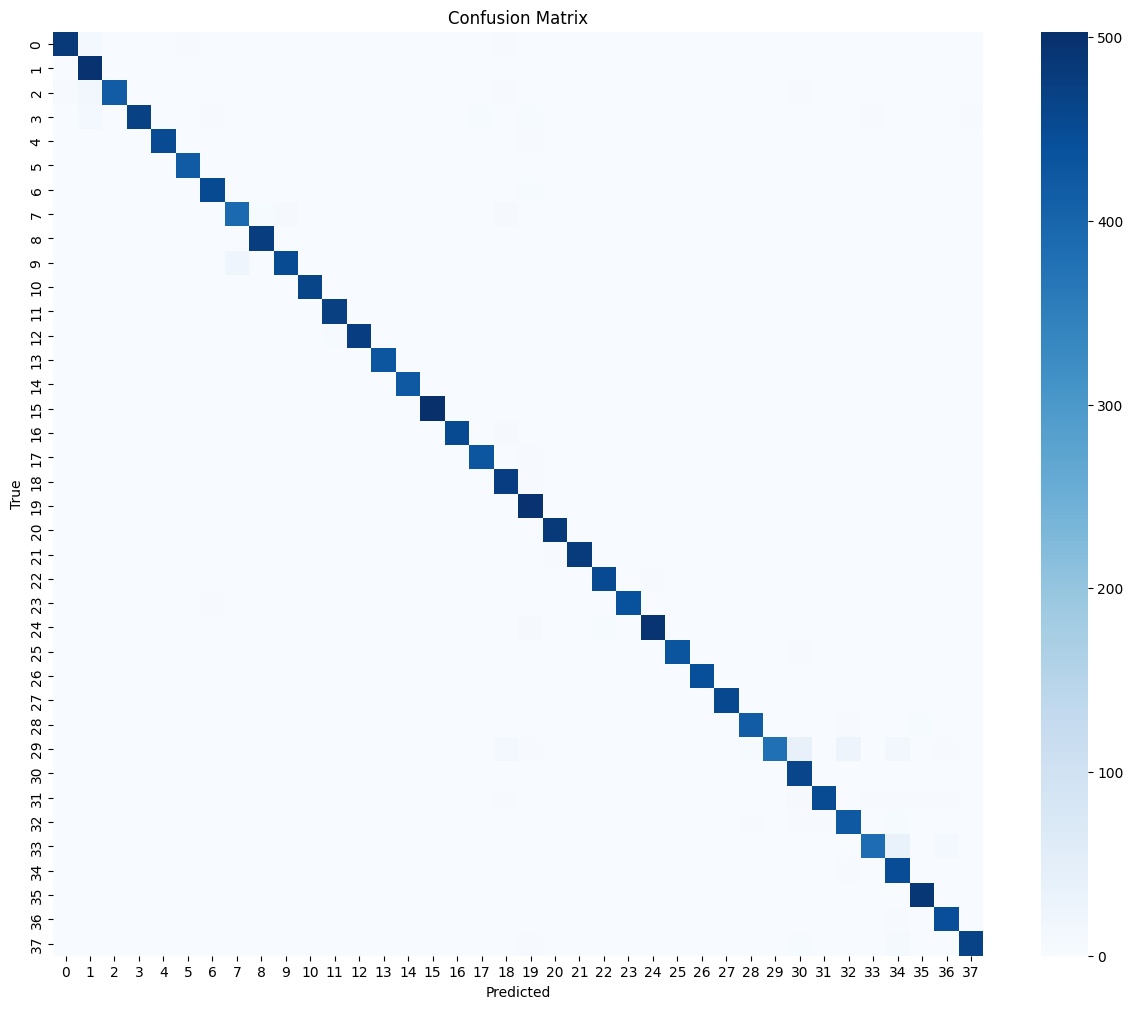

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(true_classes, pred_classes)
plt.figure(figsize=(15,12))
sns.heatmap(cm, annot=False, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [18]:
loss, accuracy = model.evaluate(val_gen)
print("Validation Accuracy:", accuracy)
print("Validation Loss:", loss)

550/550 ━━━━━━━━━━━━━━━━━━━━ 32s 59ms/step - accuracy: 0.9777 - loss: 0.0905
Validation Accuracy: 0.9771227240562439
Validation Loss: 0.08193707466125488


In [19]:
model.save("/kaggle/working/agri_guard_final.h5")